<a href="https://colab.research.google.com/github/Sahani003/Senitmental-Analysis-of-Hotel-Review/blob/main/Sentimental_Analysis_Of_Hotel_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/tripadvisor_hotel_reviews.csv")

In [4]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [6]:
df.shape

(20491, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

In [9]:
df["Rating"].value_counts()


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

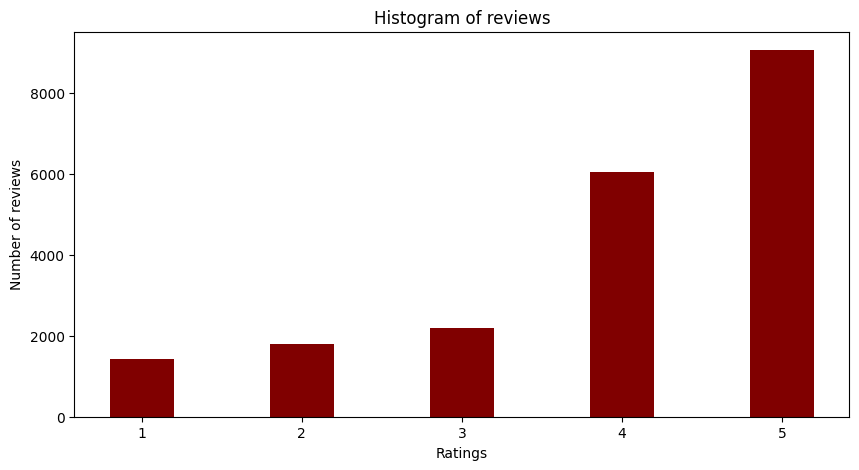

In [10]:
data = {'1': 1421, '2': 1793, '3': 2184,
        '4': 6039, '5':9054}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(courses, values, color='maroon',
        width=0.4)

plt.xlabel("Ratings")
plt.ylabel("Number of reviews")
plt.title("Histogram of reviews")
plt.show()

In [17]:
df['Length'] = df['Review'].apply(len)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                          clean_word  Length  
0  nice hotel expens park got good deal stay hote...     593  
1  ok noth special charg diamond member hilton de...    1689  
2  nice room experi hotel monaco seattl good hote...    1427  
3  uniqu great stay wonder time hotel monaco loca...     600  
4  great stay great stay went seahawk game awesom...    1281

In [18]:
df["Length"].describe().round(3)

count    20491.000
mean       724.897
std        689.101
min         44.000
25%        339.000
50%        537.000
75%        859.000
max      13501.000
Name: Length, dtype: float64

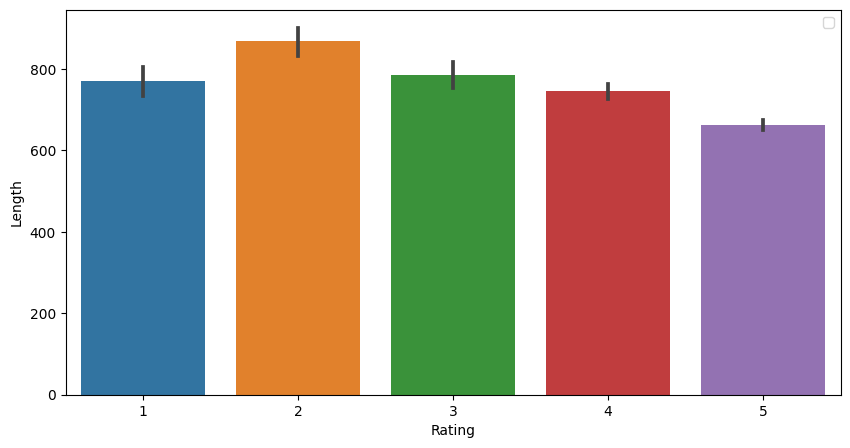

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Rating", y="Length")
plt.legend()

In [20]:
fig=px.scatter(df,x="Rating",y="Length", color="Rating")
fig.show()

In [79]:
df_5 =df[df["Rating"]==5]
df_5

Review  Rating  Length
3      unique, great stay, wonderful time hotel monac...       5     600
4      great stay great stay, went seahawk game aweso...       5    1281
5      love monaco staff husband stayed hotel crazy w...       5    1002
6      cozy stay rainy city, husband spent 7 nights m...       5     748
8      hotel stayed hotel monaco cruise, rooms genero...       5     419
...                                                  ...     ...     ...
20473  best best reason affordable better hotels city...       5     152
20476  night not trust not disappointed stay hotel, s...       5    1082
20480  great play stay stay loyal inn package deal ha...       5     256
20482  great choice wife chose best western quite bit...       5     716
20486  best kept secret 3rd time staying charm, not 5...       5     733

[9054 rows x 3 columns]

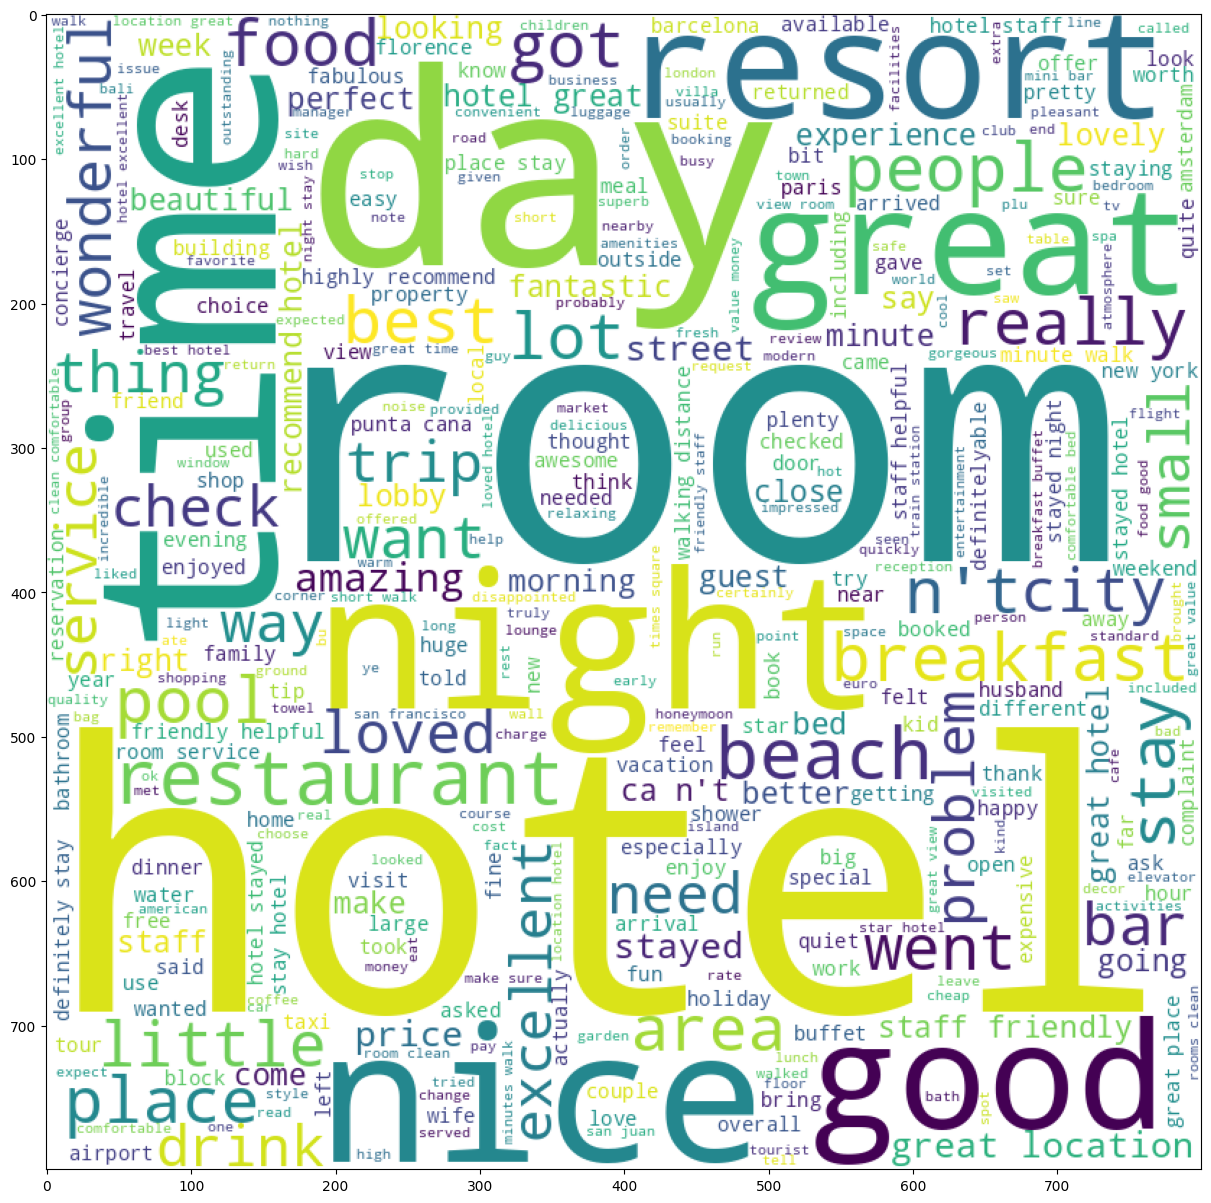

In [80]:

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

In [81]:
df_4 = df[df["Rating"]==4]
df_4

Review  Rating  Length
0      nice hotel expensive parking got good deal sta...       4     593
7      excellent staff, housekeeping quality hotel ch...       4     597
11     nice value seattle stayed 4 nights late 2007. ...       4     364
12     nice hotel good location hotel kimpton design ...       4     569
14     great hotel night quick business trip, loved l...       4     202
...                                                  ...     ...     ...
20475  good stay spent night pacific northwest/northe...       4     441
20477  nice hotel pioneer square area stayed late aug...       4     454
20478  just fine, hotel located pioneer square just q...       4     727
20483  good bed clean convenient just night happy sta...       4     420
20487  great location price view hotel great quick pl...       4     306

[6039 rows x 3 columns]

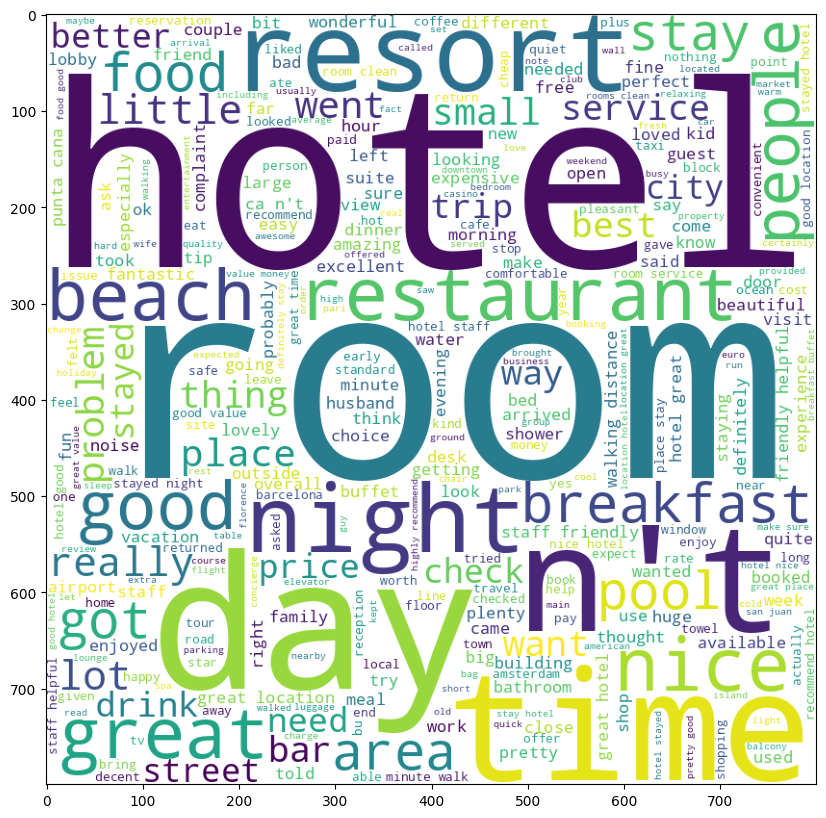

In [82]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1200, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc1)

In [83]:
df_3 = df[df["Rating"]==3]
df_3

Review  Rating  Length
2      nice rooms not 4* experience hotel monaco seat...       3    1427
13     nice hotel not nice staff hotel lovely staff q...       3     417
19     hmmmmm say really high hopes hotel monaco chos...       3    1025
25     n't mind noise place great, read reviews noise...       3     482
27     met expectations centrally located hotel block...       3     538
...                                                  ...     ...     ...
20406  good good great location new clean modern bath...       3     376
20408  ok ok. room clean tidy, staff friendly, good h...       3     165
20419  nice try stayed hotel day grand opening, booke...       3     699
20446  ok short stay booked hotel night stopover, sin...       3     566
20458  perfect ca n't beat location, beach incredible...       3     180

[2184 rows x 3 columns]

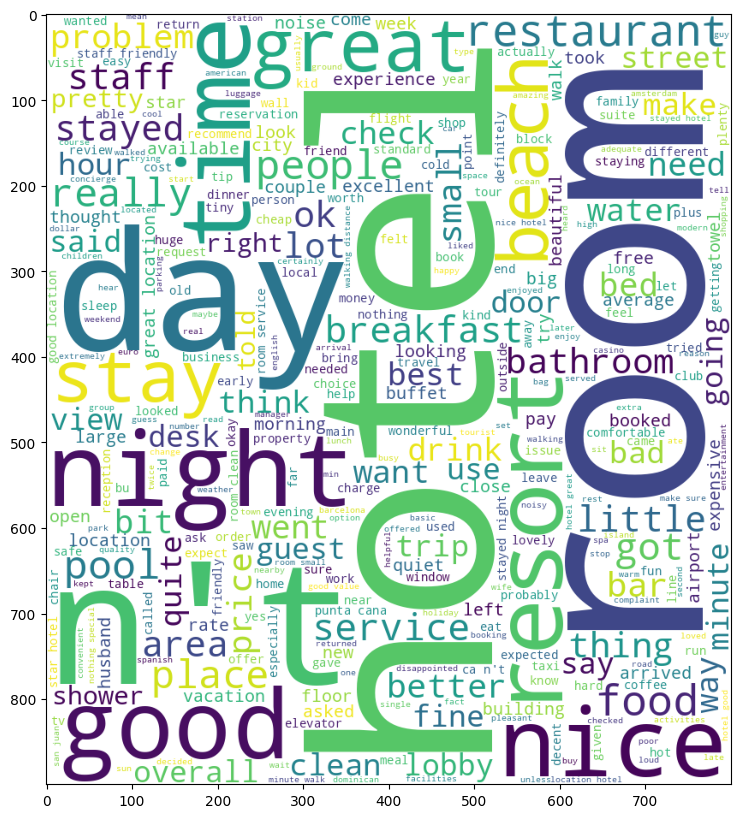

In [84]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=800, min_font_size=10,
                height=900,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc1)

In [85]:
df_2 = df[df["Rating"]==2]
df_2

Review  Rating  Length
1      ok nothing special charge diamond member hilto...       2    1689
10     poor value stayed monaco seattle july, nice ho...       2     333
16     disappointed say anticipating stay hotel monac...       2    1662
24     great location need internally upgrade advanta...       2     250
33     good location poor cleanliness warwick hotel g...       2     576
...                                                  ...     ...     ...
20481  ok price look hotel ok little run average clea...       2     247
20484  deceptive staff deceptive desk staff claiming ...       2     695
20485  not impressed unfriendly staff checked asked h...       2     616
20488  ok just looks nice modern outside, desk staff ...       2     443
20490  people talking, ca n't believe excellent ratin...       2     620

[1793 rows x 3 columns]

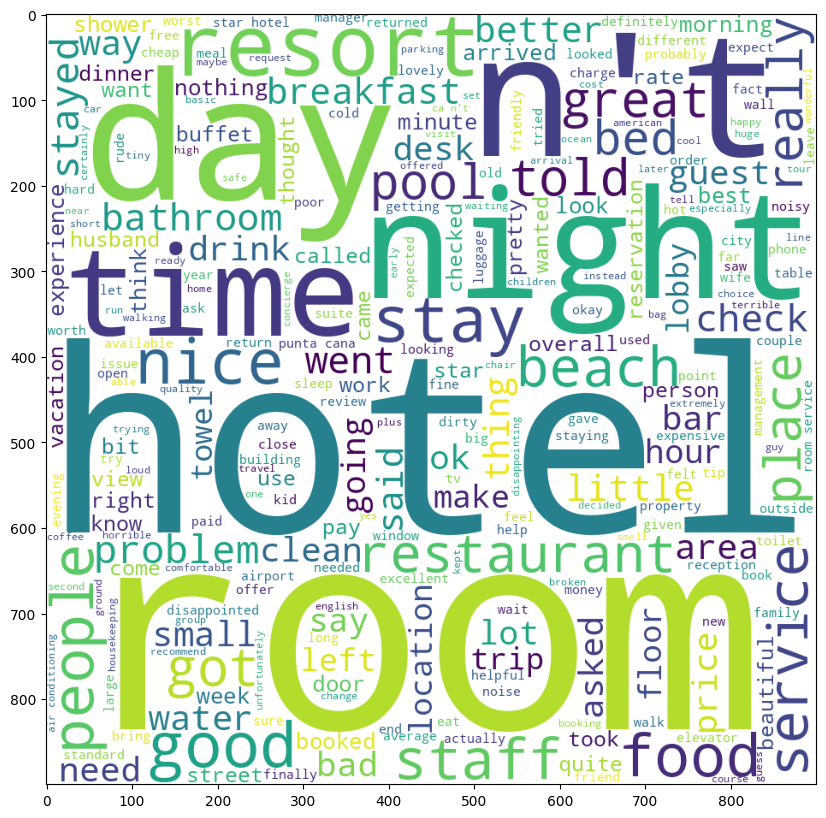

In [86]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1500, min_font_size=10,
                height=900,width=900,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc1)

In [87]:
df_1 = df[df["Rating"]==1]
df_1

Review  Rating  Length
15     horrible customer service hotel stay february ...       1    1411
32     noise airconditioner-a standard, arranged stay...       1     614
40     bad choice, booked hotel hot wire called immed...       1     861
65     hated inn terrible, room-service horrible staf...       1     133
69     ace grunge lives does mold mildew tiny bed met...       1      84
...                                                  ...     ...     ...
20421  worst sleep hip tooooo hip nite club building ...       1     342
20460  june 08 stay stayed hotel june 6/6-6/8/08, rea...       1     682
20465  not stay hotel brought group february worst ho...       1     305
20467  returning la concha nightmare surprising hotel...       1     460
20489  hotel theft ruined vacation hotel opened sept ...       1    5557

[1421 rows x 3 columns]

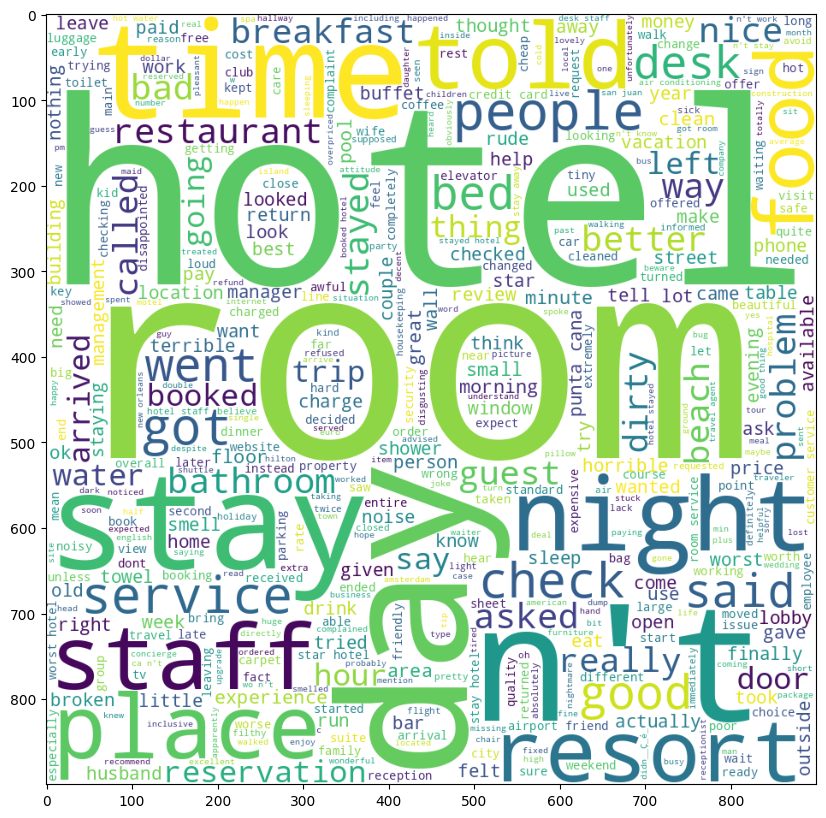

In [88]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=900,width=900,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc1)

In [89]:
def ratings(rating):
  if rating>3 and rating<=5:
    return "Positive"
  elif rating==3:
    return "Netural"
  elif rating>0 and rating<3:
    return "Negative"

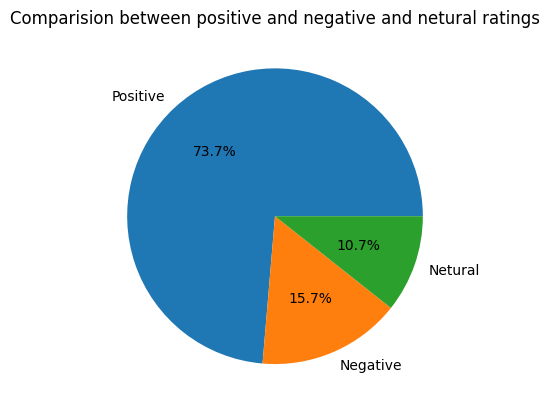

In [90]:
df['Rating'] = df['Rating'].apply(ratings)
plt.pie(df['Rating'].value_counts(),labels = df['Rating'].unique().tolist(),autopct = '%1.1f%%')
plt.title("Comparision between positive and negative and netural ratings")
plt.show()

In [9]:
a = df.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [8]:
# import library for Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [11]:
# remove any symbol and cover letter to lowercase
a = re.sub('[a-zA-Z0-9]',' ', a)
a = a.lower().split()
a

[',', ',', ',', '-', ',', ',', ',', ',', ',', ',', ',', ',']

In [9]:
# download the stopword from nlit library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
SW = set(stopwords.words('english'))
print(SW)

{'do', 'because', 'you', 'again', 'we', 'she', 'himself', 'before', 'your', 'hers', 'why', 'will', 'only', 'they', 'their', 'against', 'm', 'while', 'and', 'an', 'o', 'a', 'in', "mightn't", 'i', 'further', "you're", 'more', 'through', 's', 'me', 'mightn', 'couldn', 'have', 'then', 'but', 'all', 'down', 're', 'few', 'under', 'doing', 'shan', 'any', 'just', 'about', 'yours', 'during', "shan't", 'was', 'once', 'both', 'mustn', 'he', "you've", "aren't", 'these', 'yourselves', 'such', 'd', 'the', "it's", 'own', 'can', 'aren', 'him', 'be', 'am', 'by', 'off', "hadn't", 'has', 'if', 'ma', 'did', 'for', 'until', 'weren', 'our', 'above', 'll', 'from', "couldn't", 'who', 'between', 'or', 'so', 'had', 'how', 'doesn', 'hasn', "you'll", 'her', 'y', "hasn't", "wasn't", 'yourself', 'didn', 'myself', 'should', 'my', 'there', 'after', 'herself', 'other', "haven't", 'that', 'up', "she's", 'to', 'them', 'isn', 'of', 'below', 'over', "doesn't", 't', 'than', 'very', 'ourselves', 'are', 'what', "didn't", 'sa

In [11]:
# made loop for clean reviews - based on the stopwords
clean_word=[i for i in a if not i in SW]
clean_word

NameError: ignored

In [15]:
#now we need to make sentence - list
sen = ' '.join(clean_word)
sen

', , , - , , , , , , , ,'

In [9]:
# defined function for clean all reviews in the data set
def t_process(a):
  a = re.sub('[^a-zA-Z]',' ',a)
  a = a.lower().split()
  ps= PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in SW]
  sen=' '.join(clean_word)
  return sen

In [10]:
# add new column about the reviews after cleaning
df['clean_word']=df["Review"].apply(t_process)
df.head()

NameError: ignored

In [18]:
# Length of word in sentence
df['Length 2'] = df['clean_word'].apply(len)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                          clean_word  Length 2  
0  nice hotel expens park got good deal stay hote...       481  
1  ok noth special charg diamond member hilton de...      1407  
2  nice room experi hotel monaco seattl good hote...      1174  
3  uniqu great stay wonder time hotel monaco loca...       506  
4  great stay great stay went seahawk game awesom...      1058

In [104]:
df.describe().round(2)

Length  Length 2
count  20491.0  20491.00
mean     724.9    597.84
std      689.1    564.26
min       44.0     31.00
25%      339.0    282.00
50%      537.0    444.00
75%      859.0    709.00
max    13501.0  11189.00

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import  MLPClassifier




In [8]:
cv = CountVectorizer()
x = cv.fit_transform(df["clean_word"]).toarray()
y = df["Rating"]

KeyError: ignored

What is an N-gram?
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'
A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use CountVectorizer from Sklearn

In [12]:
cv= CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

In [13]:
Count_Values = bigrams.toarray().sum(axis=0)
ngram_freq =pd.DataFrame(sorted([(Count_Values[i],k)for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

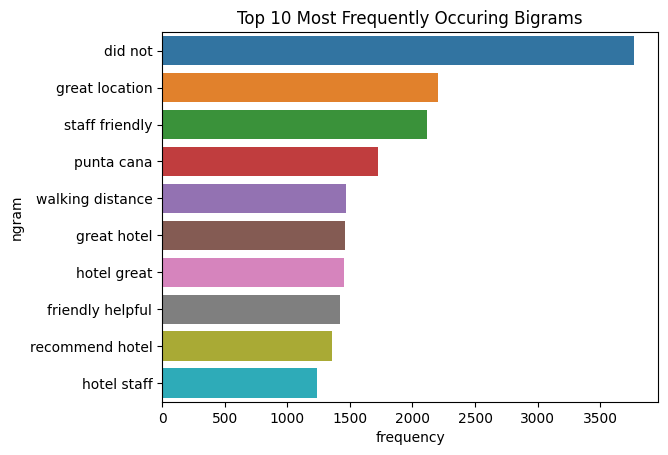

In [122]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [14]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

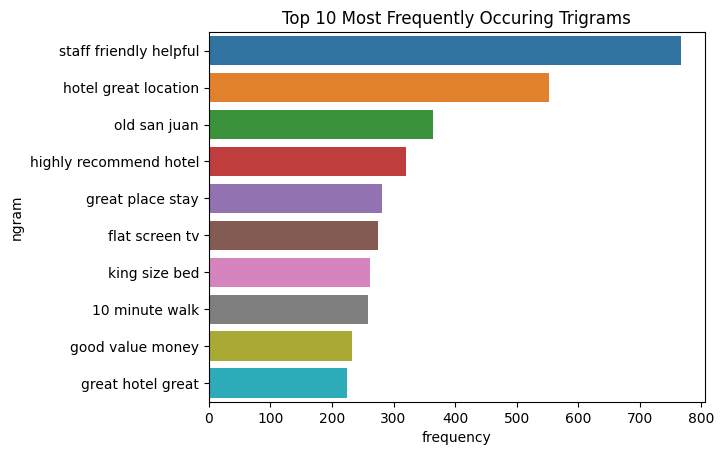

In [15]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [1]:
# the shape
print("X shape: ", x.shape)
print("y: shape ", y.shape)

NameError: ignored

In [18]:
# split the data train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("X Train : ", x_train.shape)
print("X Test  : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (15368, 35692)
X Test  :  (5123, 35692)
Y Train :  (15368,)
Y Test  :  (5123,)


In [ ]:
import xgboost
#Defined object from library classification

LR = LogisticRegression()
AD = AdaBoostRegressor()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [ ]:
LR.fit(x_train, y_train)
AD.fit(x_train, y_train)
KNR.fit(x_train,y_train)
NB.fit(x_train,y_train)

LR_Preds = LR.predict(x_test)
AD_Preds = AD.predict(x_test)
KNR_Preds = KNR.predict(x_test)
NB_Preds  = NB.predict(x_test)

LR_rmse = sqrt(mean_squared_error(y_test, LR_Preds))
AD_rmse = sqrt(mean_squared_error(y_test, AD_Preds))
KNR_rmse = sqrt(mean_squared_error(y_test, KNR_Preds))
NB_rmse = sqrt(mean_squared_error(y_test, NB_Preds))

LR_Scr = r2_score(y_test, LR_Preds)
AD_Scr = r2_score(y_test, AD_Preds)
KNR_Scr = r2_score(y_test, KNR_Preds)
NB_Scr = r2_score(y_test, NB_Preds)

print(LR_rmse,KNR_rmse, NB_rmse, AD_rmse)
print(LR_Scr, KNR_Scr, NB_Scr, AD_Scr)